In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '../data/'
df = pd.read_csv(data_path + 'ner_dataset.zip', encoding="latin1")

In [3]:
df.shape

(1048575, 4)

In [6]:
df.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


## Check for data error found in ner.csv

The `ner.csv` file had repeated elements starting around rows 281,134. Fortunately, this file looks clean.

In [35]:
df[281830:281859]

,Sentence #,Word,POS,Tag
281830,NaN,crossing,VBG,O
281831,NaN,into,IN,O
281832,NaN,Afghanistan,NNP,B-geo
281833,NaN,.,.,O
281834,Sentence: 12906,Gates,NNP,B-per
281835,NaN,just,RB,O
281836,NaN,finished,VBD,O
281837,NaN,four,CD,O
281838,NaN,days,NNS,O
281839,NaN,of,IN,O


## Examine non-missing values in 'Sentence #' column

It appears that `Sentence: #` marks the start of a new sentence. There are 47,959 sentences in this dataset.

In [39]:
df_sent = df[df['Sentence #'].isnull() == 0]
df_sent.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
24,Sentence: 2,Families,NNS,O
54,Sentence: 3,They,PRP,O
68,Sentence: 4,Police,NNS,O
83,Sentence: 5,The,DT,O


In [40]:
df_sent.tail()

,Sentence #,Word,POS,Tag
1048501,Sentence: 47955,Indian,JJ,B-gpe
1048521,Sentence: 47956,Indian,JJ,B-gpe
1048545,Sentence: 47957,Two,CD,O
1048556,Sentence: 47958,They,PRP,O
1048567,Sentence: 47959,Indian,JJ,B-gpe


In [44]:
print(f'There are {df_sent.shape[0]} observations with a non-missing \'Sentence #\'')

There are 47959 observations with a non-missing 'Sentence #'


## Check for missing values

Check for missing values other than in the `Sentence #` column, between the start of sentences.

In [14]:
df.isnull().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

## Explore Tags

This dataset came from Kaggle with this description of the tags:
    
The IOB Tagging system contains tags of the form:

B - {CHUNK_TYPE} – for the word in the Beginning chunk<br/>
I - {CHUNK_TYPE} – for words Inside the chunk<br/>
O – Outside any chunk<br/>
The IOB tags are further classified into the following classes –<br/>
<br/>
geo = Geographical Entity<br/>
org = Organization<br/>
per = Person<br/>
gpe = Geopolitical Entity<br/>
tim = Time indicator<br/>
art = Artifact<br/>
eve = Event<br/>
nat = Natural Phenomenon<br/>

In [46]:
# Find all the unique tags
unique_tags = df['Tag'].unique()
print(unique_tags)

['O' 'B-geo' 'B-gpe' 'B-per' 'I-geo' 'B-org' 'I-org' 'B-tim' 'B-art'
 'I-art' 'I-per' 'I-gpe' 'I-tim' 'B-nat' 'B-eve' 'I-eve' 'I-nat']


### Examine 'I' tags

In [75]:
# Find some example of 'I' tags which are 'words inside the chunk'
# The word in the last column will be tagged as 'I-per'
# the word in the previous column should be either 'I-per', or 'B-per'
df[df['Tag'] == 'I-per'].sample(n=5, random_state=28401)

,Sentence #,Word,POS,Tag
667305,NaN,Tony,NNP,I-per
732089,NaN,ARISTIDE,NNP,I-per
324880,NaN,Clark,NNP,I-per
313436,NaN,Fujimori,NNP,I-per
656028,NaN,Hu,NNP,I-per


In [76]:
# Look at the context around one 'I-per' tag
df[732085:732093]

,Sentence #,Word,POS,Tag
732085,NaN,exile,NN,O
732086,NaN,of,IN,O
732087,NaN,President,NNP,B-per
732088,NaN,Jean-Bertrand,NNP,I-per
732089,NaN,ARISTIDE,NNP,I-per
732090,NaN,in,IN,O
732091,NaN,February,NNP,B-tim
732092,NaN,2004,CD,I-tim


### Geographic tags

In [73]:
df[df['Tag'] == 'I-geo'].sample(n=5, random_state=93849)

,Sentence #,Word,POS,Tag
1024958,NaN,Sea,NNP,I-geo
887834,NaN,America,NNP,I-geo
851683,NaN,Berra,NNP,I-geo
197128,NaN,Africa,NNP,I-geo
389678,NaN,East,NNP,I-geo


In [74]:
df[1024953:1024963]

,Sentence #,Word,POS,Tag
1024953,NaN,migrants,NNS,O
1024954,NaN,capsized,VBN,O
1024955,NaN,in,IN,O
1024956,NaN,the,DT,O
1024957,NaN,Red,NNP,B-geo
1024958,NaN,Sea,NNP,I-geo
1024959,NaN,.,.,O
1024960,Sentence: 46875,The,DT,O
1024961,NaN,official,NN,O
1024962,NaN,said,VBD,O


### Time tags

In [72]:
df[df['Tag'] == 'I-tim'].head()

,Sentence #,Word,POS,Tag
1479,NaN,8,CD,I-tim
1993,NaN,1,CD,I-tim
4137,NaN,2,CD,I-tim
4148,NaN,3,CD,I-tim
4979,NaN,of,IN,I-tim


Note that '9' in the printed output below is considered a B-tim, even though it is part of a larger date statement. It looks like the I- vs B- prefix relates only to the word immediately preceding it.

In [56]:
df[1474:1483]

,Sentence #,Word,POS,Tag
1474,NaN,hold,VB,O
1475,NaN,a,DT,O
1476,NaN,summit,NN,O
1477,NaN,on,IN,O
1478,NaN,September,NNP,B-tim
1479,NaN,8,CD,I-tim
1480,NaN,and,CC,O
1481,NaN,9,CD,B-tim
1482,NaN,.,.,O


### Organization tags

In [68]:
df[df['Tag'] == 'I-org'].sample(n=5, random_state=777)

,Sentence #,Word,POS,Tag
839273,NaN,Department,NNP,I-org
874773,NaN,Street,NNP,I-org
154316,NaN,Revolutionary,NNP,I-org
739896,NaN,Party,NNP,I-org
611240,NaN,Curia,NNP,I-org


In [69]:
df[154312:154319]

,Sentence #,Word,POS,Tag
154312,NaN,ex-Communist,NN,O
154313,NaN,Mongolian,JJ,B-gpe
154314,NaN,People,NNP,B-org
154315,NaN,'s,POS,I-org
154316,NaN,Revolutionary,NNP,I-org
154317,NaN,Party,NNP,I-org
154318,NaN,(,LRB,O


In [16]:
tag_base = []
for i in range(len(unique_tags)-1):
    tag_base.append(unique_tags[i+1].split('-')[1])
    
tag_base = np.unique(tag_base)
print(tag_base)

['art' 'eve' 'geo' 'gpe' 'nat' 'org' 'per' 'tim']


In [18]:
lab = []
cnt = []
i = 0
pre = [ 'B', 'I']
for t in tag_base:
    for p in pre:
        lab.append(p+'-'+t)
        cnt.append(np.sum(df['Tag'] == lab[i]))
        
    i += 1

<AxesSubplot:>

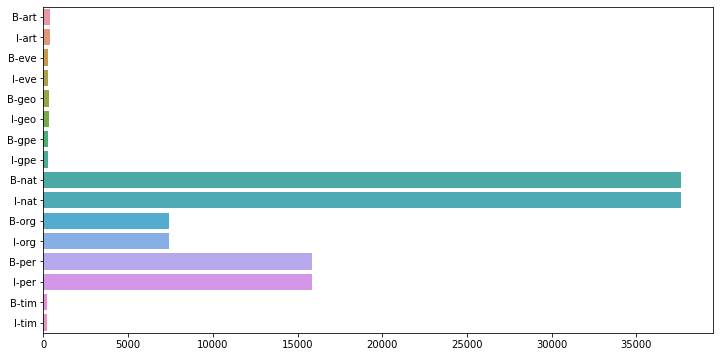

In [45]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=cnt, y=lab)

## Examine the words

In [32]:
from wordcloud import WordCloud

def df2text(df):
    s = []
    i = 1
    for w in df:
        s.append(str(w))
    
    return ' '.join(s)

def draw_word_cloud(df, width=800, height=800):
    text = df2text(df)
    word_cloud = WordCloud(background_color='white', width=width, height=height).generate(text)
    
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [10,10]
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

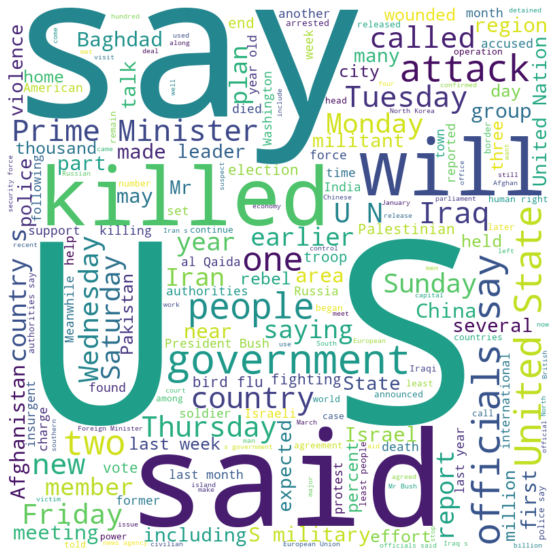

In [33]:
draw_word_cloud(df['Word'])